# Stock Market  Prediction
#### by Naman Sharma

### Task Description
#### A stock price prediction project is an excellent starting point. It involves using historical stock market datasets, volatility indices, and fundamental indicators to forecast prices over the coming months. It'sa valuable introduction to working with large datasets and prediction modeling. Begin by downloading a stock market dataset from sourceslike Quantopian or Quandl to kickstart the project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns

In [2]:
stockData = pd.read_csv("stockmarket.csv",delimiter=",")

In [3]:
stockData.head(5)

,Date,Closing Volume,Volume,50-Day Moving Average,200-Day Moving Average
0,1/1/2020,68.600085,478427.5295,51.893619,50.959857
1,1/2/2020,31.925191,252965.4955,51.906495,50.970882
2,1/3/2020,20.655860,550649.0876,52.849305,51.072842
3,1/4/2020,14.877282,396448.9526,53.680538,50.982403
4,1/5/2020,42.326829,425087.2775,55.077963,50.941873


In [4]:
stockData.isnull().sum()

Date                      0
Closing Volume            0
Volume                    0
50-Day Moving Average     0
200-Day Moving Average    0
dtype: int64

In [5]:
stockData.isna().sum()

Date                      0
Closing Volume            0
Volume                    0
50-Day Moving Average     0
200-Day Moving Average    0
dtype: int64

In [6]:
stockData.columns

Index(['Date', 'Closing Volume', 'Volume', '50-Day Moving Average',
       '200-Day Moving Average'],
      dtype='object')

In [7]:
stockData.Date

0         1/1/2020
1         1/2/2020
2         1/3/2020
3         1/4/2020
4         1/5/2020
           ...    
2495    10/31/2026
2496     11/1/2026
2497     11/2/2026
2498     11/3/2026
2499     11/4/2026
Name: Date, Length: 2500, dtype: object

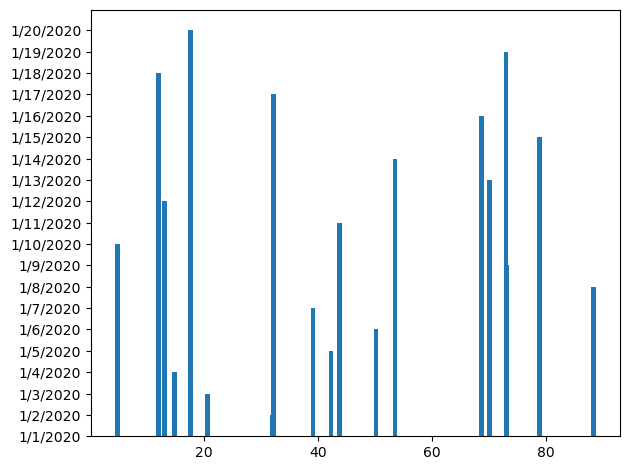

In [8]:
# plt.bar(stockData.Date,stockData["Closing Volume"])
plt.bar(stockData['Closing Volume'].head(20),stockData['Date'].head(20))
plt.tight_layout()
plt.show()

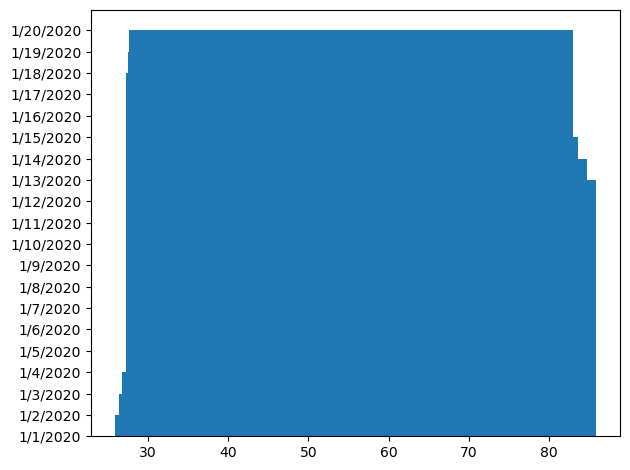

In [9]:
# plt.bar(stockData.Date,stockData["Closing Volume"])
plt.bar(stockData['50-Day Moving Average'].head(20),stockData['Date'].head(20),stockData['50-Day Moving Average'].head(20))
plt.tight_layout()
plt.show()

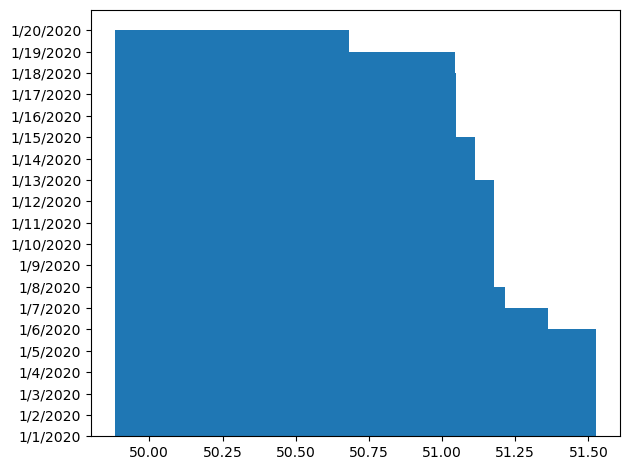

In [10]:
plt.bar(stockData['200-Day Moving Average'].head(20),stockData['Date'].head(20))
plt.tight_layout()
plt.show()

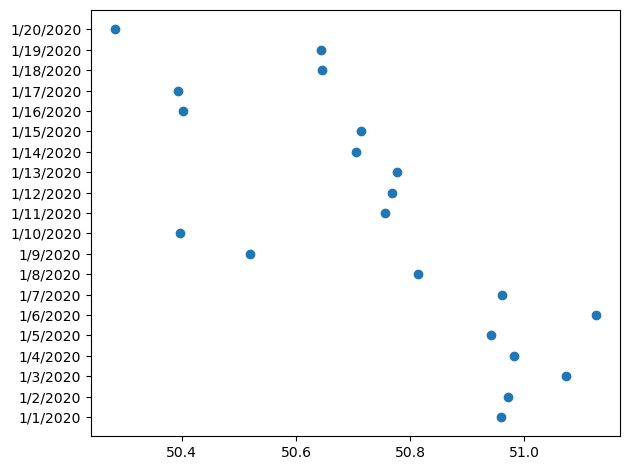

In [11]:
plt.scatter(stockData['200-Day Moving Average'].head(20),stockData['Date'].head(20))
plt.tight_layout()
plt.show()

In [12]:
stockData.Date.head(5)
stockData['Date'] = pd.to_datetime(stockData['Date'])
stockData['Year'] = stockData["Date"].dt.year
stockData['Month'] = stockData["Date"].dt.month
stockData['Day'] = stockData["Date"].dt.day
stockData.drop(columns='Date',inplace=True)

In [13]:
stockData.columns

Index(['Closing Volume', 'Volume', '50-Day Moving Average',
       '200-Day Moving Average', 'Year', 'Month', 'Day'],
      dtype='object')

In [14]:
stockData.head(5)

,Closing Volume,Volume,50-Day Moving Average,200-Day Moving Average,Year,Month,Day
0,68.600085,478427.5295,51.893619,50.959857,2020,1,1
1,31.925191,252965.4955,51.906495,50.970882,2020,1,2
2,20.655860,550649.0876,52.849305,51.072842,2020,1,3
3,14.877282,396448.9526,53.680538,50.982403,2020,1,4
4,42.326829,425087.2775,55.077963,50.941873,2020,1,5


In [15]:
regressor = LinearRegression()
yData= stockData['Closing Volume']
stockData.drop(columns=['Closing Volume'],inplace=True)

XTrain, XTest, YTrain, YTest = train_test_split(stockData,yData, test_size=.2, random_state=42)

In [16]:
regressor.fit(XTrain,YTrain)
prediction = regressor.predict(XTest)

In [17]:
print(prediction[:5])

[49.33829864 43.03209683 41.21900293 55.38938546 44.42482609]


In [18]:
mae = mean_absolute_error(YTest, prediction)

In [19]:
mae

25.098191840016614

In [20]:
mae = mean_absolute_error(YTest, prediction)

In [21]:
mae

25.098191840016614

## MAE = 25.098191840016614


## Now check it using Random Forest Regression

In [22]:
model = RandomForestRegressor()
model.fit(XTrain, YTrain)
prediction1 = model.predict(XTest)

In [23]:
print(prediction1[:5])

[55.72477459 37.23161479 42.56305436 60.98149371 45.59010558]


In [24]:
mae1 = mean_absolute_error(YTest, prediction1)

In [25]:
mae1

25.337154132079203

## MAE1 = 25.60659039779908

## Now using Gradient Boosting Regressor

In [26]:
gradient = GradientBoostingRegressor()
gradient.fit(XTrain,YTrain)
prediction3 = gradient.predict(XTest)


In [27]:
print(prediction3[:3])

[60.4836876  42.07616158 45.52700006]


In [28]:
mae2 = mean_absolute_error(YTest, prediction3)

In [29]:
mae2

25.101294123535162

## MAE3 = 25.087850447868455

In [30]:
stockData.head(4)

,Volume,50-Day Moving Average,200-Day Moving Average,Year,Month,Day
0,478427.5295,51.893619,50.959857,2020,1,1
1,252965.4955,51.906495,50.970882,2020,1,2
2,550649.0876,52.849305,51.072842,2020,1,3
3,396448.9526,53.680538,50.982403,2020,1,4


In [31]:
newData = {"Original Data": YTest, "Predicted Data": prediction}
newData = pd.DataFrame(newData)

In [32]:
newData.head(10)

,Original Data,Predicted Data
1447,96.211718,49.338299
1114,2.156858,43.032097
1064,86.590503,41.219003
2287,35.532779,55.389385
1537,66.733504,44.424826
668,80.976841,49.782630
1583,39.409589,55.492781
2404,80.531903,46.356266
497,21.491129,56.967573
2480,38.609831,44.260409


In [33]:
newData.head(5)

,Original Data,Predicted Data
1447,96.211718,49.338299
1114,2.156858,43.032097
1064,86.590503,41.219003
2287,35.532779,55.389385
1537,66.733504,44.424826


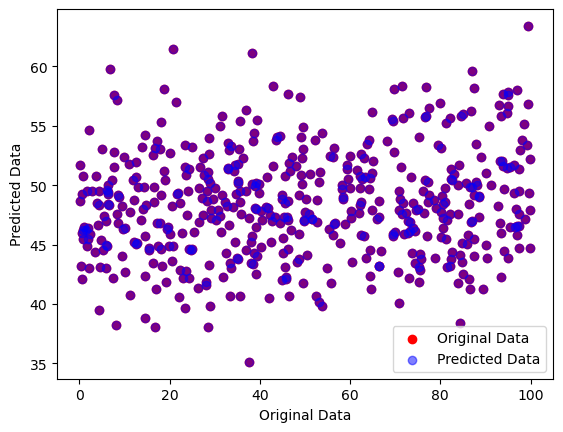

In [34]:

plt.scatter(newData['Original Data'], newData['Predicted Data'], color='red', label="Original Data")

plt.scatter(newData['Original Data'], newData['Predicted Data'], color='blue', label="Predicted Data", alpha=.5)

plt.xlabel('Original Data')
plt.ylabel('Predicted Data')
plt.legend()

# Show the plot
plt.show()

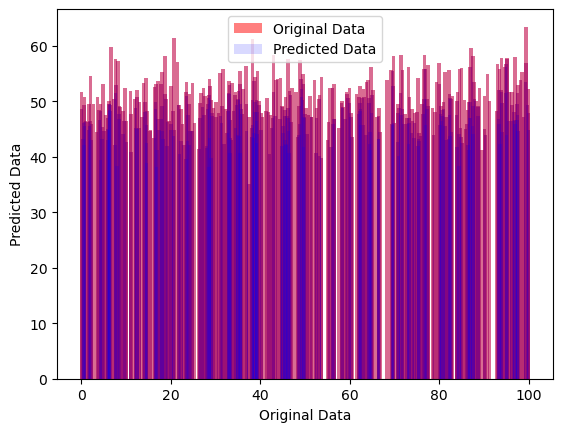

In [35]:

plt.bar(newData['Original Data'], newData['Predicted Data'], color='red', label="Original Data", alpha=.5)

plt.bar(newData['Original Data'], newData['Predicted Data'], color='blue', label="Predicted Data", alpha=.15)

plt.xlabel('Original Data')
plt.ylabel('Predicted Data')
plt.legend()

# Show the plot
plt.show()

## if we standerdize the data

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(XTrain)
X_test_scaled = scaler.transform(XTest)

In [37]:
gradient = GradientBoostingRegressor()
gradient.fit(X_train_scaled,YTrain)
prediction3 = gradient.predict(X_test_scaled)


In [38]:
mae2 = mean_absolute_error(YTest, prediction3)

In [39]:
mae2

25.09239211794136

In [40]:
print(X_train_scaled[:5])

[[ 1.22220203 -0.9236446   1.31562762  1.05329102  0.46967641  0.15098896]
 [ 1.44201254  1.1834664   1.33181195  1.05329102 -0.41014203 -0.07411572]
 [ 0.5131663  -0.80585647 -0.43213752  1.05329102 -1.28996048 -0.97453443]
 [-1.10077811  0.47244454 -0.25767911  1.55943759 -0.41014203 -0.07411572]
 [ 0.05514429 -1.06677392  1.47516582 -0.97129528 -0.70341485 -1.08708677]]


In [41]:
print(X_test_scaled[:5])

[[-1.55982191 -0.3036947  -0.31432501  0.04099787  1.64276768  0.2635413 ]
 [ 0.17060071 -1.30827017 -0.53580322  0.04099787 -1.5832333   0.37609364]
 [ 1.01520671 -1.09550769 -1.05888094 -0.4651487   1.34949486  1.61416937]
 [-0.00865715  1.40307273  0.39517593  1.55943759 -0.70341485 -1.08708677]
 [ 1.23362662 -0.59286305 -0.58246593  0.54714445 -0.99668766  0.15098896]]


# Same Result we got 